<a href="https://colab.research.google.com/github/liuchenbaidu/colab_code/blob/main/akshare_guzhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install akshare -i http://mirrors.aliyun.com/pypi/simple/ --trusted-host=mirrors.aliyun.com  --upgrade

Looking in indexes: http://mirrors.aliyun.com/pypi/simple/, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 962 kB 311 kB/s 
     |████████████████████████████████| 5.4 MB 101 kB/s 
     |████████████████████████████████| 55 kB 1.4 MB/s 
     |████████████████████████████████| 128 kB 1.3 MB/s 
     |████████████████████████████████| 96 kB 1.7 MB/s 
     |████████████████████████████████| 1.4 MB 1.4 MB/s 
     |████████████████████████████████| 140 kB 1.4 MB/s 
     |████████████████████████████████| 48 kB 1.5 MB/s 
     |████████████████████████████████| 127 kB 1.4 MB/s 
  Created wheel for jsonpath: filename=jsonpath-0.82-py3-none-any.whl size=5612 sha256=9287afdaabc33fac31fbaddc412a691047dfa6741622ec710570c81f48115e83
  Stored in directory: /root/.cache/pip/wheels/5c/c2/27/ed70791fa7f27345d1a2eb31db907f97a36b9fb1ff2cf3329c
Successfully built jsonpath
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Unins

In [14]:
import akshare as ak

stock_zh_index_value_csindex_df = ak.stock_zh_index_value_csindex(symbol="H30374")
print(stock_zh_index_value_csindex_df['日期'])

0     2022-12-01
1     2022-11-30
2     2022-11-29
3     2022-11-28
4     2022-11-25
5     2022-11-24
6     2022-11-23
7     2022-11-22
8     2022-11-21
9     2022-11-18
10    2022-11-17
11    2022-11-16
12    2022-11-15
13    2022-11-14
14    2022-11-11
15    2022-11-10
16    2022-11-09
17    2022-11-08
18    2022-11-07
19    2022-11-04
Name: 日期, dtype: object


In [18]:
 ak.index_value_name_funddb() 

,指数名称,最新PE,PE分位,最新PB,PB分位,股息率,股息率分位,指数代码,指数开始时间,更新时间
0,CS稀金属,14.04,0.35,3.79,33.82,0.56,66.88,930632.CSI,NaT,2022-12-02
1,有色金属(申万),14.91,0.45,2.64,36.93,1.04,82.57,801050.SI,2003-10-16,2022-12-02
2,A股资源,9.16,0.79,1.28,38.39,4.45,98.43,000805.CSI,2012-01-06,2022-12-02
3,煤炭(申万),6.92,0.83,1.43,59.48,6.07,95.61,801950.SI,NaT,2022-12-02
4,通信设备,20.61,0.84,2.39,2.86,1.58,98.28,931160.CSI,NaT,2022-12-02
...,...,...,...,...,...,...,...,...,...,...
154,汽车(申万),33.05,93.38,2.23,51.06,1.20,18.82,801880.SI,2014-02-21,2022-12-02
155,农林牧渔(申万),99.07,94.00,3.10,29.69,0.47,16.83,801010.SI,2003-10-16,2022-12-02
156,中证全指电力指数,47.41,94.34,1.78,68.77,1.88,5.22,h30199.CSI,NaT,2022-12-02
157,全指公用,37.65,94.82,1.78,64.88,1.94,11.24,000995.CSI,NaT,2022-12-02


In [ ]:
import akshare as ak

index_value_hist_funddb_df = ak.index_value_hist_funddb(symbol="大盘成长", indicator="市盈率")
index_value_hist_funddb_df

In [33]:
!pip install backtrader


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
!pip install matplotlib==3.2.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


初始资金: 1000000
回测期间：19910403:20200616
总资金: 1217360.83
净收益: 217360.83


<IPython.core.display.Javascript object>

[[<Figure size 432x288 with 4 Axes>]]

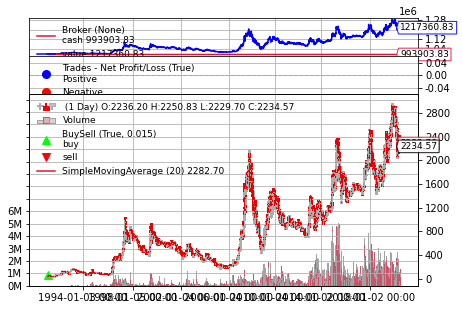

In [44]:
%matplotlib inline
from datetime import datetime

import backtrader as bt  # 升级到最新版
import matplotlib.pyplot as plt  # 由于 Backtrader 的问题，此处要求 pip install matplotlib==3.2.2
import akshare as ak  # 升级到最新版
import pandas as pd

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 利用 AKShare 获取股票的后复权数据，这里只获取前 6 列
stock_hfq_df = ak.stock_zh_a_hist(symbol="000001", adjust="hfq").iloc[:, :6]
# 处理字段命名，以符合 Backtrader 的要求
stock_hfq_df.columns = [
    'date',
    'open',
    'close',
    'high',
    'low',
    'volume',
]
# 把 date 作为日期索引，以符合 Backtrader 的要求
stock_hfq_df.index = pd.to_datetime(stock_hfq_df['date'])


class MyStrategy(bt.Strategy):
    """
    主策略程序
    """
    params = (("maperiod", 20),)  # 全局设定交易策略的参数

    def __init__(self):
        """
        初始化函数
        """
        self.data_close = self.datas[0].close  # 指定价格序列
        # 初始化交易指令、买卖价格和手续费
        self.order = None
        self.buy_price = None
        self.buy_comm = None
        # 添加移动均线指标
        self.sma = bt.indicators.SimpleMovingAverage(
            self.datas[0], period=self.params.maperiod
        )

    def next(self):
        """
        执行逻辑
        """
        if self.order:  # 检查是否有指令等待执行,
            return
        # 检查是否持仓
        if not self.position:  # 没有持仓
            if self.data_close[0] > self.sma[0]:  # 执行买入条件判断：收盘价格上涨突破20日均线
                self.order = self.buy(size=100)  # 执行买入
        else:
            if self.data_close[0] < self.sma[0]:  # 执行卖出条件判断：收盘价格跌破20日均线
                self.order = self.sell(size=100)  # 执行卖出


cerebro = bt.Cerebro()  # 初始化回测系统
start_date = datetime(1991, 4, 3)  # 回测开始时间
end_date = datetime(2020, 6, 16)  # 回测结束时间
data = bt.feeds.PandasData(dataname=stock_hfq_df, fromdate=start_date, todate=end_date)  # 加载数据
cerebro.adddata(data)  # 将数据传入回测系统
cerebro.addstrategy(MyStrategy)  # 将交易策略加载到回测系统中
start_cash = 1000000
cerebro.broker.setcash(start_cash)  # 设置初始资本为 100000
cerebro.broker.setcommission(commission=0.002)  # 设置交易手续费为 0.2%
cerebro.run()  # 运行回测系统

port_value = cerebro.broker.getvalue()  # 获取回测结束后的总资金
pnl = port_value - start_cash  # 盈亏统计

print(f"初始资金: {start_cash}\n回测期间：{start_date.strftime('%Y%m%d')}:{end_date.strftime('%Y%m%d')}")
print(f"总资金: {round(port_value, 2)}")
print(f"净收益: {round(pnl, 2)}")

cerebro.plot(style='candlestick')  # 画图

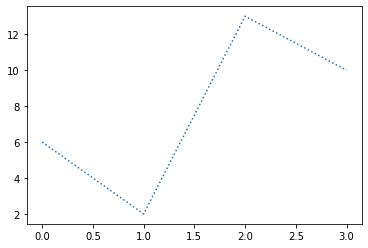

In [40]:
%matplotlib inline  #### 很重要
import matplotlib.pyplot as plt
import numpy as np

ypoints = np.array([6, 2, 13, 10])

plt. plot (ypoints, linestyle = 'dotted')
plt.show()